In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import cv2
from sklearn.preprocessing import OneHotEncoder
from keras.applications.resnet import ResNet50
from keras.models import Model, Sequential
from keras.layers import Dense, Input, Conv2D, Flatten
import tensorflow as tf

# Data preprocessing

In [2]:
table=pd.read_csv("fer2013.csv").values
x=list()
for i in range(table.shape[0]):
    table[i][1]=np.uint8(np.asarray(table[i][1].split(' ')).reshape((48,48,1)))
    im=table[i][1]
    im=cv2.merge([im,im,im])
    x.append(im)
    print("Current row : %d"%i,end="\r")
print("\nDone!")
table=table[:,:-1]
x=np.float32(np.asarray(x))/255.0
y=np.uint8(table[:,0])
onehot_encoder = OneHotEncoder(sparse=False, categories='auto')
y = onehot_encoder.fit_transform(y.reshape(-1,1))
np.save("xval.npy",x)
np.save("yval.npy",y)
np.save("data.npy",table)

Current row : 35886
Done!


In [3]:
x=np.load('xval.npy')
y=np.load('yval.npy')

In [4]:
table=np.load('data.npy', allow_pickle=True)

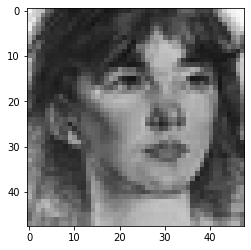

In [5]:
image=x[random.randint(0,x.shape[1]-1)]
plt.imshow(np.asarray(image.reshape(48,48,3)))
plt.show()

In [6]:
resnet=ResNet50(weights='imagenet', include_top=False, input_shape=(x.shape[1],x.shape[2],3))
resnet.summary()

n[0][0]          
__________________________________________________________________________________________________
conv3_block4_out (Activation)   (None, 6, 6, 512)    0           conv3_block4_add[0][0]           
__________________________________________________________________________________________________
conv4_block1_1_conv (Conv2D)    (None, 3, 3, 256)    131328      conv3_block4_out[0][0]           
__________________________________________________________________________________________________
conv4_block1_1_bn (BatchNormali (None, 3, 3, 256)    1024        conv4_block1_1_conv[0][0]        
__________________________________________________________________________________________________
conv4_block1_1_relu (Activation (None, 3, 3, 256)    0           conv4_block1_1_bn[0][0]          
__________________________________________________________________________________________________
conv4_block1_2_conv (Conv2D)    (None, 3, 3, 256)    590080      conv4_block1_1_relu[0][0] 

In [11]:
# model.add(Input(shape=(48,48,1)))
# model.add(Conv2D(filters=3,kernel_size=3,padding='same'))
mx=resnet.output
mx=Flatten()(mx)
mx=Dense(1000,activation='relu')(mx)
mx=Dense(y.shape[1],activation='softmax')(mx)
model=Model(resnet.input,mx)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

onv[0][0]        
__________________________________________________________________________________________________
conv4_block1_1_relu (Activation (None, 3, 3, 256)    0           conv4_block1_1_bn[0][0]          
__________________________________________________________________________________________________
conv4_block1_2_conv (Conv2D)    (None, 3, 3, 256)    590080      conv4_block1_1_relu[0][0]        
__________________________________________________________________________________________________
conv4_block1_2_bn (BatchNormali (None, 3, 3, 256)    1024        conv4_block1_2_conv[0][0]        
__________________________________________________________________________________________________
conv4_block1_2_relu (Activation (None, 3, 3, 256)    0           conv4_block1_2_bn[0][0]          
__________________________________________________________________________________________________
conv4_block1_0_conv (Conv2D)    (None, 3, 3, 1024)   525312      conv3_block4_out[0][0]    

In [18]:
with tf.device('/gpu:0'):
    history=model.fit(x,y,epochs=10,batch_size=128,verbose=1)

Epoch 1/10
35887/35887 [==============================] - 1111s 31ms/step - loss: 1.2873 - accuracy: 0.5078
Epoch 2/10
35887/35887 [==============================] - 1138s 32ms/step - loss: 1.0562 - accuracy: 0.6050
Epoch 3/10
35887/35887 [==============================] - 1153s 32ms/step - loss: 0.9210 - accuracy: 0.6591
Epoch 4/10
10240/35887 [=======>......................] - ETA: 14:03 - loss: 0.7319 - accuracy: 0.7296